In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as np
import shapely

from shapely.affinity import translate
from shapely.geometry import LineString, Point, Polygon
from shapely.ops import substring

**The first way I was thinking about this**

In [180]:
width = 1
height = 5

In [167]:
# Test nadir track
nadir = LineString([[-1,-5], [4,10]])

In [168]:
# Test pixel centroid
pixel = Point([2,2])

In [169]:
pixel.coords[0]

(2.0, 2.0)

In [170]:
# Get distance along nadir track closest to pixel centroid
dist = nadir.project(pixel)

In [171]:
dist

np.float64(7.58946638440411)

In [172]:
# Get coordinate of point along nadir closest to pixel centroid
projection = substring(nadir, 0, dist).coords[1]

In [173]:
# Create linestring from pixel to closest point on nadir track
orthogonal = LineString([pixel.coords[0], projection])

In [174]:
# Get left midpoint
left_mid_coord = substring(orthogonal, 0, width/2).coords[1]
left_mid_pt = Point(left_mid_coord)

In [175]:
# Get distance for translation form nadir
mid_dist = orthogonal.length - width/2

In [176]:
left_edge = nadir.parallel_offset(distance=mid_dist, side='right')
right_edge = nadir.parallel_offset(distance=mid_dist+width, side='right')

In [177]:
# Get right midpoint
right_dist = right_edge.project(pixel)
right_mid_coord = substring(right_edge, 0, right_dist).coords[1]
right_mid_pt = Point(right_mid_coord)

In [193]:
one_coord = substring(left_edge, dist, dist+height/2).coords[1]
one_pt = Point(one_coord)

two_coord = substring(right_edge, dist, dist+height/2).coords[1]
two_pt = Point(two_coord)

three_coord = substring(right_edge, dist-height/2, dist).coords[0]
three_pt = Point(three_coord)

four_coord = substring(left_edge, dist-height/2, dist).coords[0]
four_pt = Point(four_coord)

In [203]:
pseudo_pixel = Polygon((one_coord, two_coord, three_coord, four_coord, one_coord))

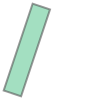

In [205]:
pseudo_pixel

In [151]:
# left_edge = translate(geom=nadir, xoff=edge_dist, yoff=edge_dist)
# right_edge = translate(geom=nadir, xoff=edge_dist+width, yoff=edge_dist+width)
# left_gs = gpd.GeoSeries(left_edge)

<Axes: >

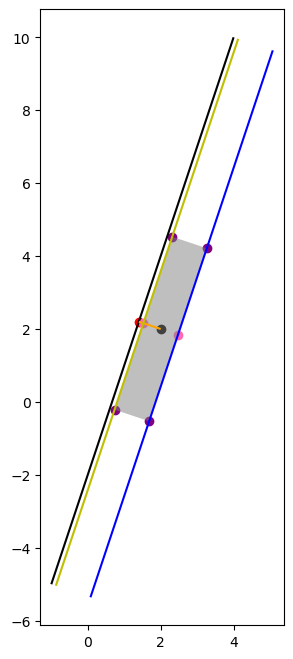

In [199]:
fig, ax = plt.subplots(figsize=(8,8))
gpd.GeoSeries(nadir).plot(ax=ax, color='k')
gpd.GeoSeries(pixel).plot(ax=ax, color='k')

gpd.GeoSeries(Point(projection)).plot(ax=ax, color='r')
gpd.GeoSeries(orthogonal).plot(ax=ax, color='orange')
gpd.GeoSeries(left_mid_pt).plot(ax=ax, color='hotpink')
gpd.GeoSeries(right_mid_pt).plot(ax=ax, color='hotpink')

gpd.GeoSeries(right_edge).plot(ax=ax, color='b')
gpd.GeoSeries(left_edge).plot(ax=ax, color='y')

gpd.GeoSeries(one_pt).plot(ax=ax, color='purple')
gpd.GeoSeries(two_pt).plot(ax=ax, color='purple')
gpd.GeoSeries(three_pt).plot(ax=ax, color='purple')
gpd.GeoSeries(four_pt).plot(ax=ax, color='purple')

gpd.GeoSeries(pseudo_pixel).plot(ax=ax, color='grey', alpha=0.5)

**With actual SWOT data**

In [207]:
nadir = gpd.read_file('/nas/cee-water/cjgleason/data/SWOT/swath/swot_science_hr_Aug2021-v05_shapefile_nadir/swot_science_hr_2.0s_4.0s_Aug2021-v5_nadir.shp')

In [210]:
nadir.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

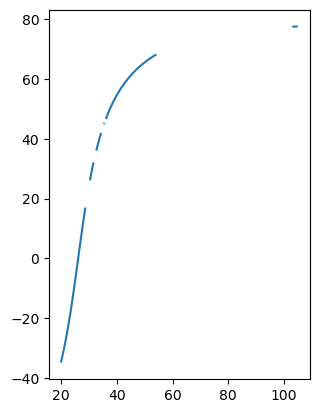

In [209]:
nadir[nadir['ID_PASS'] == 583].plot()